In [21]:
import pandas as pd

In [22]:
df = pd.read_csv('hotel_reviews (1).csv')

In [23]:
print("DataFrame Info:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              7001 non-null   int64  
 1   Name               7001 non-null   object 
 2   Area               7001 non-null   object 
 3   Review_Date        7001 non-null   object 
 4   Rating_attribute   7001 non-null   object 
 5   Rating(Out of 10)  7001 non-null   float64
 6   Review_Text        6994 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 383.0+ KB
DataFrame Info:
 None


In [24]:
df.describe()

,Index,Rating(Out of 10)
count,7001.00000,7001.000000
mean,3500.00000,7.030981
std,2021.15895,2.882846
min,0.00000,1.000000
25%,1750.00000,6.000000
50%,3500.00000,8.000000
75%,5250.00000,9.000000
max,7000.00000,10.000000


In [25]:
import numpy as np
import string

def clean_text(text):
    if isinstance(text, float) and np.isnan(text):
        return ''
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ''.join([i for i in text if not i.isdigit()])
    return text

df['cleaned_review'] = df['Review_Text'].apply(clean_text)


print(df[[ 'Review_Text','cleaned_review']].head())

                                         Review_Text  \
0  Hotel the pearl is perfect place to stay in De...   
1  Location of the hotel is perfect. The hotel is...   
2                             Location, Indian food.   
3  The location and the hotel itself is great. Ne...   
4  Friendly and smiling staffs.. The reception st...   

                                      cleaned_review  
0  hotel the pearl is perfect place to stay in de...  
1  location of the hotel is perfect the hotel is ...  
2                               location indian food  
3  the location and the hotel itself is great nex...  
4  friendly and smiling staffs the reception staf...  


In [26]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if isinstance(text, float) and pd.isna(text):
        return ''
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

def remove_stop_words(text):
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

df['cleaned_review'] = df['Review_Text'].apply(clean_text)

df['cleaned_review'] = df['cleaned_review'].apply(remove_stop_words)
print(df[[ 'Review_Text','cleaned_review']].head())

                                         Review_Text  \
0  Hotel the pearl is perfect place to stay in De...   
1  Location of the hotel is perfect. The hotel is...   
2                             Location, Indian food.   
3  The location and the hotel itself is great. Ne...   
4  Friendly and smiling staffs.. The reception st...   

                                      cleaned_review  
0  hotel pearl perfect place stay delhi paharganj...  
1  location hotel perfect hotel peaceful nice sta...  
2                               location indian food  
3  location hotel great next time stay nice rooms...  
4  friendly smiling staffs reception staff excell...  


In [28]:
def tokenize_text(text):
    return word_tokenize(text)

df['Tokens'] = df['cleaned_review'].apply(tokenize_text)
print(df[['Review_Text', 'cleaned_review', 'Tokens']].head())

                                         Review_Text  \
0  Hotel the pearl is perfect place to stay in De...   
1  Location of the hotel is perfect. The hotel is...   
2                             Location, Indian food.   
3  The location and the hotel itself is great. Ne...   
4  Friendly and smiling staffs.. The reception st...   

                                      cleaned_review  \
0  hotel pearl perfect place stay delhi paharganj...   
1  location hotel perfect hotel peaceful nice sta...   
2                               location indian food   
3  location hotel great next time stay nice rooms...   
4  friendly smiling staffs reception staff excell...   

                                              Tokens  
0  [hotel, pearl, perfect, place, stay, delhi, pa...  
1  [location, hotel, perfect, hotel, peaceful, ni...  
2                           [location, indian, food]  
3  [location, hotel, great, next, time, stay, nic...  
4  [friendly, smiling, staffs, reception, staff, ..

In [29]:
from nltk.stem import WordNetLemmatizer

In [30]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df['lemmatized_review'] = df['cleaned_review'].apply(lemmatize_text)

print(df[['Review_Text', 'lemmatized_review']].head())


                                         Review_Text  \
0  Hotel the pearl is perfect place to stay in De...   
1  Location of the hotel is perfect. The hotel is...   
2                             Location, Indian food.   
3  The location and the hotel itself is great. Ne...   
4  Friendly and smiling staffs.. The reception st...   

                                   lemmatized_review  
0  hotel pearl perfect place stay delhi paharganj...  
1  location hotel perfect hotel peaceful nice sta...  
2                               location indian food  
3  location hotel great next time stay nice room ...  
4  friendly smiling staff reception staff excelle...  


In [32]:
!pip install wordcloud

In [33]:

from wordcloud import WordCloud


import matplotlib.pyplot as plt

In [34]:
df['Cleaned_Review_Text'] = df['Review_Text'].astype(str).str.lower().str.replace('[^\w\s]', '', regex=True)

def sentiment_label(rating):
    if rating >= 7:
        return 'positive'
    #elif rating <= 3:
     #   return 'negative'
    else:
        return 'negative'

In [35]:
print(df['Rating(Out of 10)'])

0        9.0
1        9.0
2        9.0
3        9.0
4        9.0
        ... 
6996    10.0
6997     9.0
6998    10.0
6999    10.0
7000     2.0
Name: Rating(Out of 10), Length: 7001, dtype: float64


In [36]:
df['Sentiment'] = df['Rating(Out of 10)'].apply(sentiment_label)
print(df['Sentiment'])

0       positive
1       positive
2       positive
3       positive
4       positive
          ...   
6996    positive
6997    positive
6998    positive
6999    positive
7000    negative
Name: Sentiment, Length: 7001, dtype: object


In [37]:
df['Rating(Out of 10)'] = pd.to_numeric(df['Rating(Out of 10)'], errors='coerce')
print(df['Rating(Out of 10)'])

0        9.0
1        9.0
2        9.0
3        9.0
4        9.0
        ... 
6996    10.0
6997     9.0
6998    10.0
6999    10.0
7000     2.0
Name: Rating(Out of 10), Length: 7001, dtype: float64


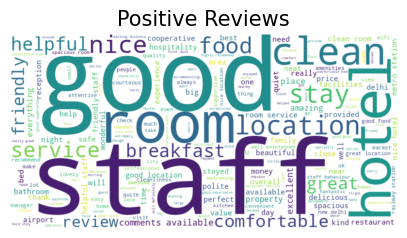

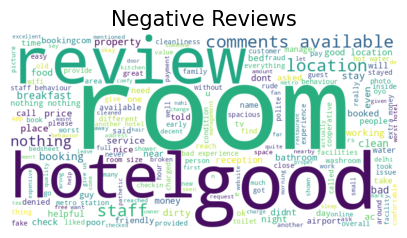

In [38]:
def generate_wordcloud(text, title=None):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, size=15)
    plt.axis('off')
    plt.show()
positive_reviews = ' '.join(df[df['Sentiment'] == 'positive']['Cleaned_Review_Text'])
negative_reviews = ' '.join(df[df['Sentiment'] == 'negative']['Cleaned_Review_Text'])

generate_wordcloud(positive_reviews, title='Positive Reviews')
generate_wordcloud(negative_reviews, title='Negative Reviews')


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['lemmatized_review'])

print("TF-IDF matrix shape:", X.shape)

y = (df['Rating(Out of 10)'] >= 5).astype(int)

print(df[['Rating(Out of 10)', 'lemmatized_review']])


TF-IDF matrix shape: (7001, 5000)
      Rating(Out of 10)                                  lemmatized_review
0                   9.0  hotel pearl perfect place stay delhi paharganj...
1                   9.0  location hotel perfect hotel peaceful nice sta...
2                   9.0                               location indian food
3                   9.0  location hotel great next time stay nice room ...
4                   9.0  friendly smiling staff reception staff excelle...
...                 ...                                                ...
6996               10.0  room good comfortable aesthetic hotel good loc...
6997                9.0                                         good hotel
6998               10.0  good experience hotel good staff well done foo...
6999               10.0                                          well done
7000                2.0                                            nothing

[7001 rows x 2 columns]


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.880085653104925
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.38      0.54       254
           1       0.88      0.99      0.93      1147

    accuracy                           0.88      1401
   macro avg       0.89      0.69      0.73      1401
weighted avg       0.88      0.88      0.86      1401



In [ ]:
from transformers import pipeline

sentiment_analysis = pipeline("sentiment-analysis")
def classify_emotion(sentence):
    result = sentiment_analysis(sentence)[0]
    label = result['label']
    score = result['score']

    if label == 'POSITIVE' and score >=0.7:
        return 'Positive'

    else:
        return 'Negative'

sentence = input("Enter your sentence: ")
category = classify_emotion(sentence)
print(f"The sentence is classified as: {category}")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [44]:
import pickle

# Assuming 'model' is your trained Logistic Regression model
# Save the model to a file
with open('sentiment_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [45]:
# Load the model from the file
with open('sentiment_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model for predictions
loaded_model.predict(X_test)

array([1, 1, 1, ..., 1, 0, 1])

In [46]:
import pickle

# Assuming 'tfidf' is your TF-IDF Vectorizer
# Save the vectorizer to a file
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)